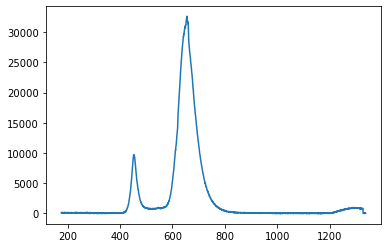

In [43]:
import numpy as np
from matplotlib import pyplot as plt

raw_to_RGB = np.array([
    [0.15575, -4.57075, 5.61976],
    [-0.154146, 2.25802, -1.15557],
    [1.06855, -0.190241, 0.0306091]
])

np.savetxt("raw_to_RGB.txt", raw_to_RGB)

data = np.loadtxt("FlowerSpectrum.txt", skiprows = 8, delimiter = ";")
w_spectrum = data[:, 0]
spectrum = data[:, 1] - data[:, 3]

plt.plot(w_spectrum, spectrum)

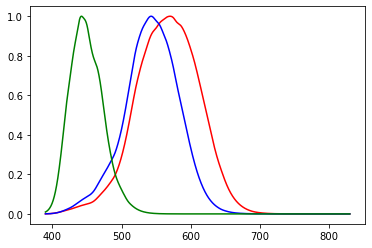

In [20]:
sensitivity = np.loadtxt("Sensitivity.csv", delimiter = ",", skiprows = 1)
w_sensitivity = sensitivity[:, 0]
red = sensitivity[:, 1]
blue = sensitivity[:, 2]
green = sensitivity[:, 3]

fig, ax = plt.subplots(1, 1)

ax.plot(w_sensitivity, red, color = "red")
ax.plot(w_sensitivity, blue, color = "blue")
ax.plot(w_sensitivity, green, color = "green")

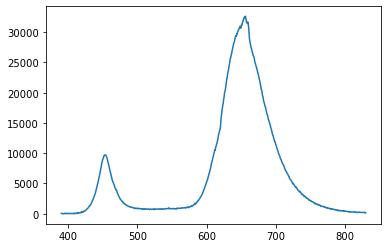

In [29]:
spectrum_interp = np.interp(w_sensitivity, w_spectrum, spectrum)

plt.plot(w_sensitivity, spectrum_interp)

[0.81140907 0.15869049 1.        ]


<AxesSubplot:>

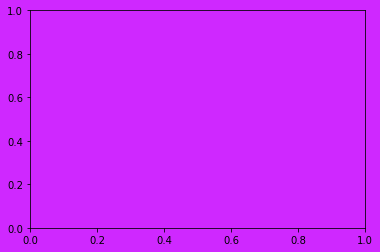

In [42]:
stimuli_red = np.sum(red * spectrum_interp)
stimuli_green = np.sum(green * spectrum_interp)
stimuli_blue = np.sum(blue * spectrum_interp)

stimuli = [stimuli_red, stimuli_blue, stimuli_green]
stimuli /= max(stimuli)

rgb = raw_to_RGB @ stimuli
rgb /= max(rgb)

print(rgb)

plt.figure(facecolor = rgb)
plt.axes(facecolor = rgb)